In [13]:
import numpy as np
import os
import pandas as pd

In [14]:
file = '/home/bde/Git/Informer2020/results/informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/metrics.npy'

metrics = np.load(file)
metrics

array([1.0857445e+04, 5.6620832e+08, 2.3795133e+04,           inf,
                 inf], dtype=float32)

In [15]:
file = '/home/bde/Git/Informer2020/results/informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/real_prediction.npy'
real_prediction = np.load(file)
real_prediction

array([[[6666.959]]], dtype=float32)

In [16]:
file = '/home/bde/Git/Informer2020/results/informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0/true.npy'
true0 = np.load(file)

file = '/home/bde/Git/Informer2020/results/informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0/pred.npy'
pred0 = np.load(file)

file = '/home/bde/Git/Informer2020/results/informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/true.npy'
true1 = np.load(file)

file = '/home/bde/Git/Informer2020/results/informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/pred.npy'
pred1 = np.load(file)

if true0.all() == true1.all():
    print('true0 equals true1')

if pred0.all() == pred1.all():
    print('pred0 equals pred1')

df = pd.DataFrame({'true': true0.flatten(), 'pred': pred0.flatten()})
df

true0 equals true1
pred0 equals pred1


,true,pred
0,21206.0,8951.554688
1,24186.0,29665.669922
2,25038.0,29194.312500
3,25725.0,25113.689453
4,102522.0,32474.953125
...,...,...
4859,4506.0,-1275.451172
4860,4940.0,-1653.873047
4861,5284.0,-1644.353516
4862,4156.0,-1570.205078


<Axes: >

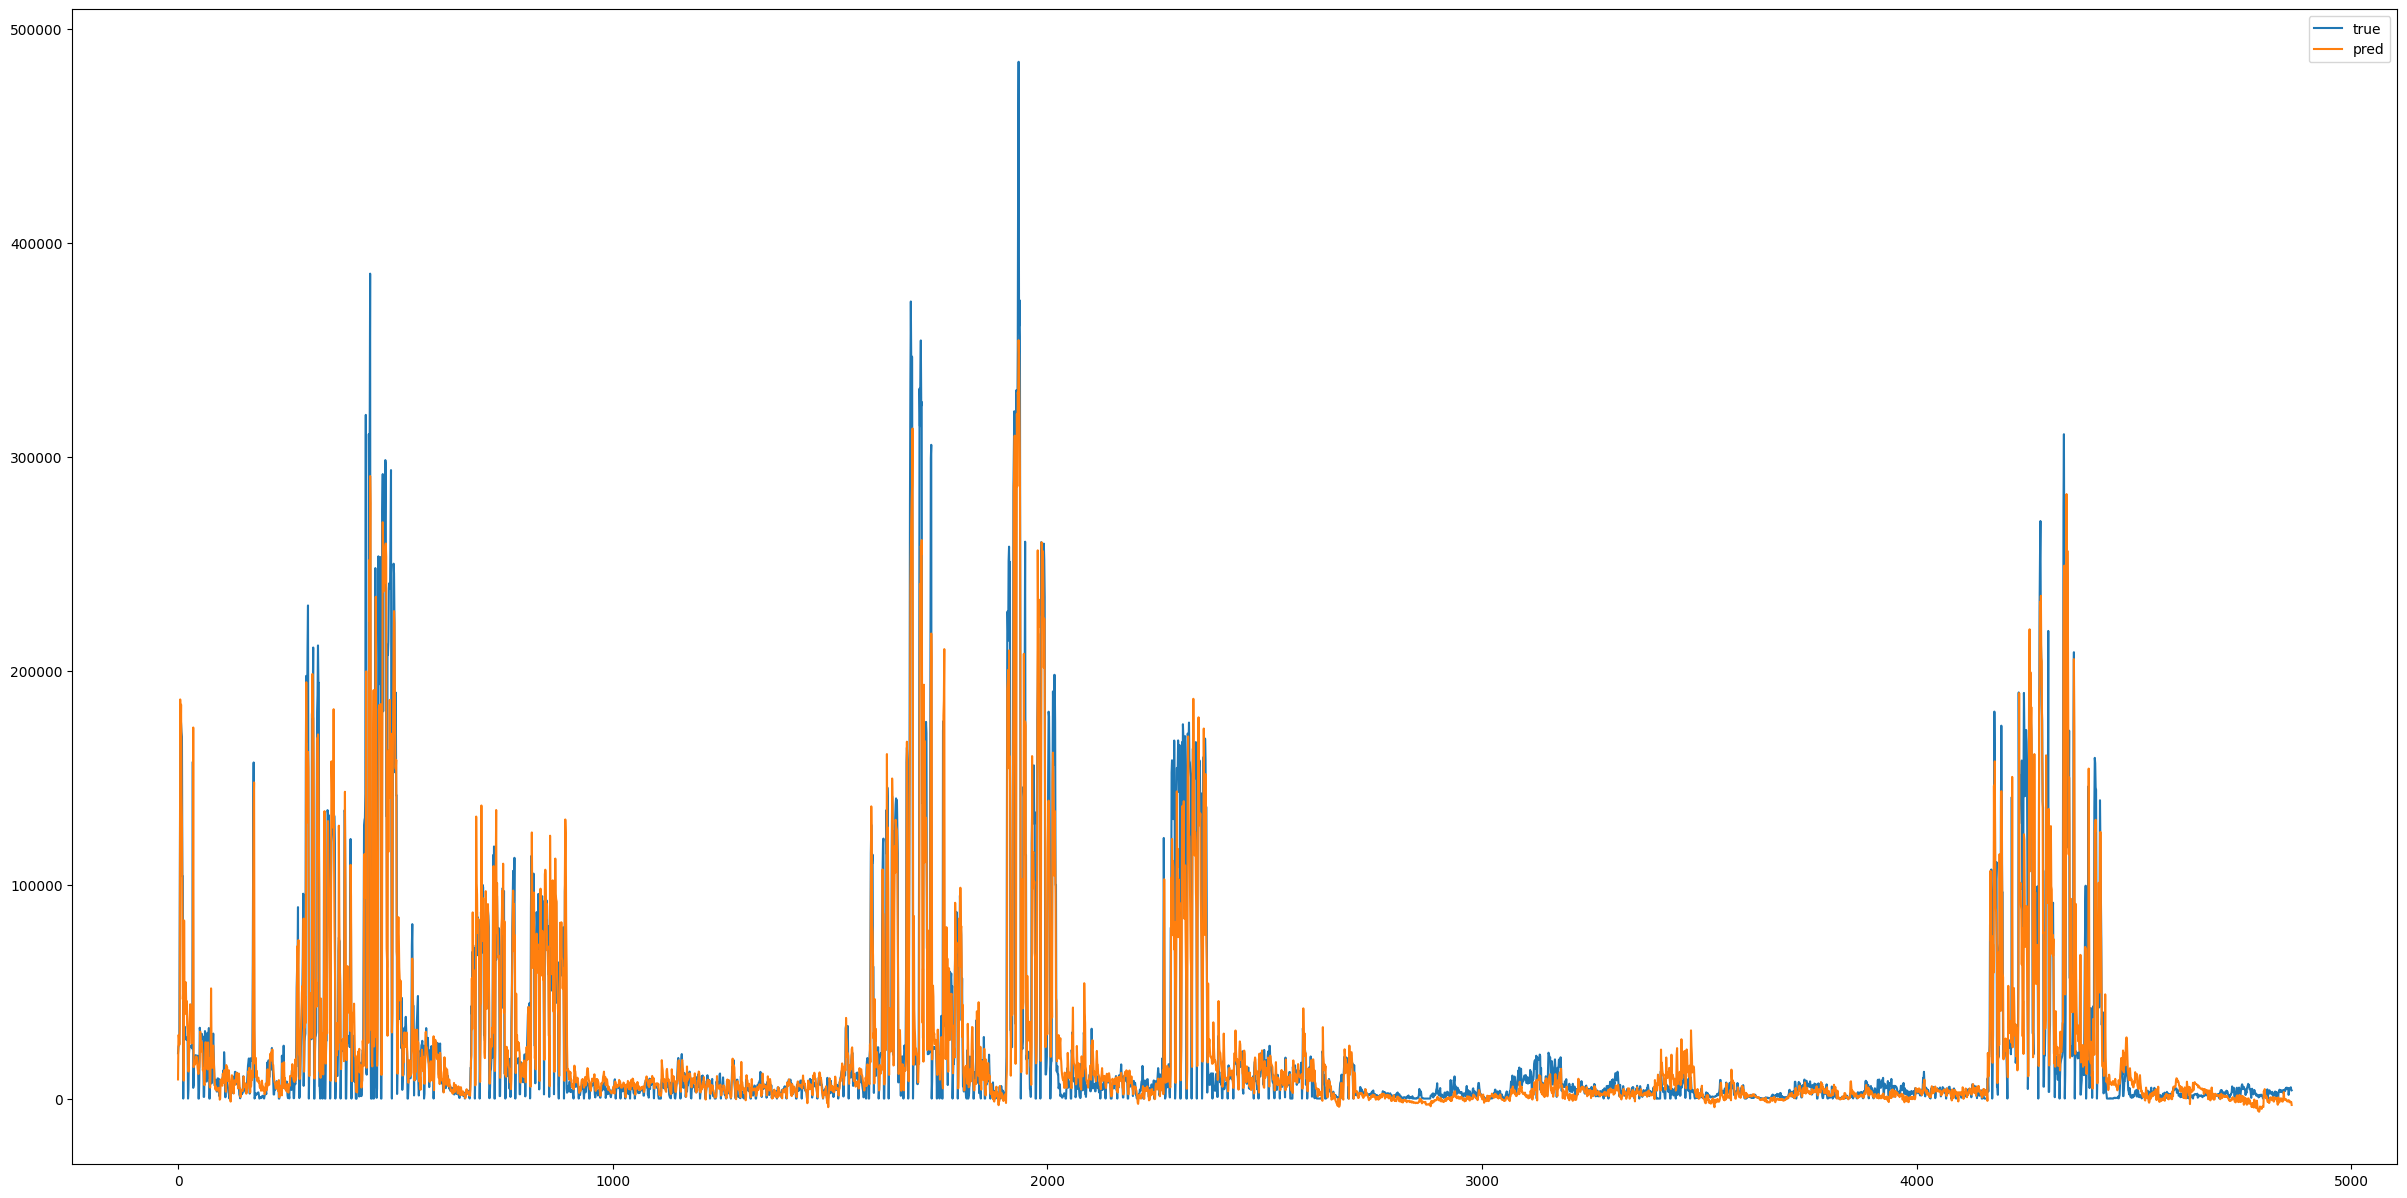

In [18]:
df.plot(figsize=(30,15))